optimal j: 2
mean estimate 0.20054200542005404 369
mean estimate 0.4894179894179894 378
mean estimate 0.7474332648870662 9253


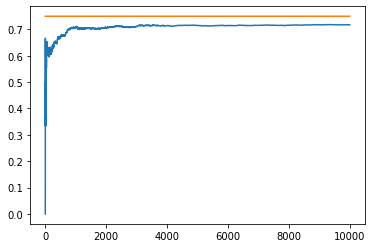

In [1]:
import matplotlib.pyplot as plt
import numpy as np

NUM_TRIALS = 10000
DECAY_RATE = 0.99
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
  def __init__(self, p):
    self.p = p
    self.p_estimate = 0
    self.N = 0

  # returns the reward.
  def pull(self):
    # the reward which is either 0 or 1
    reward = np.random.random() < self.p

    return reward

  # update the model with the reward.
  def update(self, reward):
    self.N = self.N + 1
    # mean = 1 / N * (N-1)prev_mean + newvalue
    self.p_estimate = 1/(self.N) * ((self.N - 1)*self.p_estimate + reward)

  # get the next action to take based on the beta distribution.
  def sample(self):
    return self.p_estimate

def epsilon_greedy():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  EPS = 0.95
  rewards = np.zeros(NUM_TRIALS)
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits]) # choose the bandit with the best winning percentage.
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):
    # use epsilon-greedy to select the next bandit
    if (np.random.random() < EPS):
      j = np.random.randint(len(bandits))
    else:
      j = np.argmax([b.sample() for b in bandits])

    if (j == optimal_j):
      num_optimal += 1

    # pull the arm of the bandit with the largest sample.
    reward = bandits[j].pull()

    # update the model
    bandits[j].update(reward)

    # update rewards log
    rewards[i] = reward

    # decay the epsilon
    if (EPS >= 0.1):
      EPS *= DECAY_RATE

  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate", b.p_estimate, b.N)

  # print total reward
  #print("total reward earned:", rewards.sum())
  #print("overall win rate", rewards.sum() / NUM_TRIALS)
  #print("num_times_explored:", num_times_explored)
  #print("num_times_exploited:", num_times_exploited)
  #print("num times slected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

if __name__ == "__main__":
  epsilon_greedy()